# Regressão Logística I
## Tarefa I

Neste exercício vamos trabalhar com a base "Heart Disease Data Set" disponível no site do [UCI](https://archive.ics.uci.edu/ml/datasets/heart+disease).

Temos 303 indivíduos e vamos utilizar 13 variáveis disponíveis para prever a presença de doença cardíaca na variável ```num```(a 14$^a$ variável).

A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [2]:
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf
import statsmodels.api as sm

In [3]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2


In [4]:
df['flag_doente'] = (df['num'] != 0).astype('int64')
df.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1


1. Monte uma bivariada para a variável ```sex``` com as seguintes estatísticas:

- Número de *saudáveis*
- Número de *doentes*
- Total
- Quantidade média de doentes
- *Odds*
- *Odds ratio* (Use o total como referência)
- Logito (LOG(*Odds*))
- O LOG do *Odds ratio* (com o total como referência) é chamado de *Weight of Evidence* (WOE). Calcule-o.

In [5]:
# Substituição dos valores nas colunas 'sex' e 'flag_doente'
new_df = df.copy()
new_df['sex'] = new_df['sex'].replace({0: 'feminino', 1: 'masculino'})
new_df['flag_doente'] = new_df['flag_doente'].replace({0: 'saudavel', 1: 'doente'})

tab_biv_sex = pd.crosstab(new_df['sex'], new_df['flag_doente'], margins= True)
tab_biv_sex

flag_doente,doente,saudavel,All
sex,,,
feminino,25,72,97
masculino,114,92,206
All,139,164,303


In [6]:
# Cálculo das estatísticas
tab_biv_sex['media_doentes'] = tab_biv_sex['doente'] / tab_biv_sex['All']
tab_biv_sex['odds_doentes'] = tab_biv_sex['media_doentes'] / (1 - tab_biv_sex['media_doentes'])
tab_biv_sex['odds_ratio'] = tab_biv_sex['odds_doentes'] / tab_biv_sex.loc['All', 'odds_doentes']
tab_biv_sex['logito_doentes'] = np.log(tab_biv_sex['odds_doentes'])
tab_biv_sex['woe'] = np.log(tab_biv_sex['odds_ratio'])

# Exibição da tabela
tab_biv_sex

flag_doente,doente,saudavel,All,media_doentes,odds_doentes,odds_ratio,logito_doentes,woe
sex,,,,,,,,
feminino,25,72,97,0.257732,0.347222,0.409672,-1.057790,-0.892398
masculino,114,92,206,0.553398,1.239130,1.461996,0.214410,0.379802
All,139,164,303,0.458746,0.847561,1.000000,-0.165392,0.000000


2. Monte uma bivariada para a variável ```age``` com as seguintes estatísticas:
- Categorize a variável em 5 grupos
- Calcule as mesmas quantidades calculadas no execício anterior
- Calcule também o valor médio da variável ```age```

In [7]:
new_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,masculino,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,saudavel
1,67.0,masculino,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,doente
2,67.0,masculino,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,doente
3,37.0,masculino,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,saudavel
4,41.0,feminino,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,saudavel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,masculino,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,doente
299,68.0,masculino,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,doente
300,57.0,masculino,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,doente
301,57.0,feminino,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,doente


In [8]:
# Categorização da variável 'age' em 5 grupos
new_df['cat_age'] = pd.cut(new_df['age'], bins=5, right=True)

# Criação da tabela
tab_biv_age = pd.crosstab(new_df['cat_age'], new_df['flag_doente'], margins=True)

# Cálculo das estatísticas
tab_biv_age['media_doentes'] = tab_biv_age['doente'] / tab_biv_age['All']
tab_biv_age['odds_doentes'] = tab_biv_age['media_doentes'] / (1 - tab_biv_age['media_doentes'])
tab_biv_age['odds_ratio'] = tab_biv_age['odds_doentes'] / tab_biv_age.loc['All', 'odds_doentes']
tab_biv_age['logito_doentes'] = np.log(tab_biv_age['odds_doentes'])
tab_biv_age['woe'] = np.log(tab_biv_age['odds_ratio'])



# Exibição da tabela e do valor médio
tab_biv_age

flag_doente,doente,saudavel,All,media_doentes,odds_doentes,odds_ratio,logito_doentes,woe
cat_age,,,,,,,,
"(28.952, 38.6]",3,8,11,0.272727,0.375000,0.442446,-0.980829,-0.815437
"(38.6, 48.2]",21,50,71,0.295775,0.420000,0.495540,-0.867501,-0.702108
"(48.2, 57.8]",41,56,97,0.422680,0.732143,0.863823,-0.311780,-0.146387
"(57.8, 67.4]",67,40,107,0.626168,1.675000,1.976259,0.515813,0.681206
"(67.4, 77.0]",7,10,17,0.411765,0.700000,0.825899,-0.356675,-0.191282
All,139,164,303,0.458746,0.847561,1.000000,-0.165392,0.000000


In [9]:
# Cálculo do valor médio da variável 'age'
media_idade = df['age'].mean()
print('Valor médio da variável age:', round( media_idade,2))

Valor médio da variável age: 54.44


3. Visualize a informação da bivariada construída acima através de um gráfico da sua escolha.

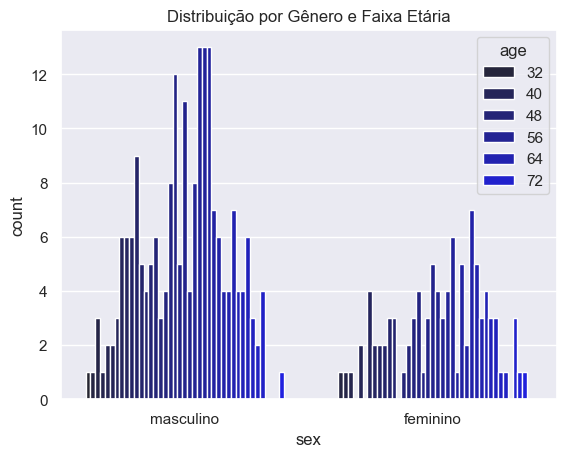

In [16]:
sns.countplot(data=new_df, x='sex', hue='age', palette='dark:blue')
plt.title('Distribuição por Gênero e Faixa Etária')
plt.show()

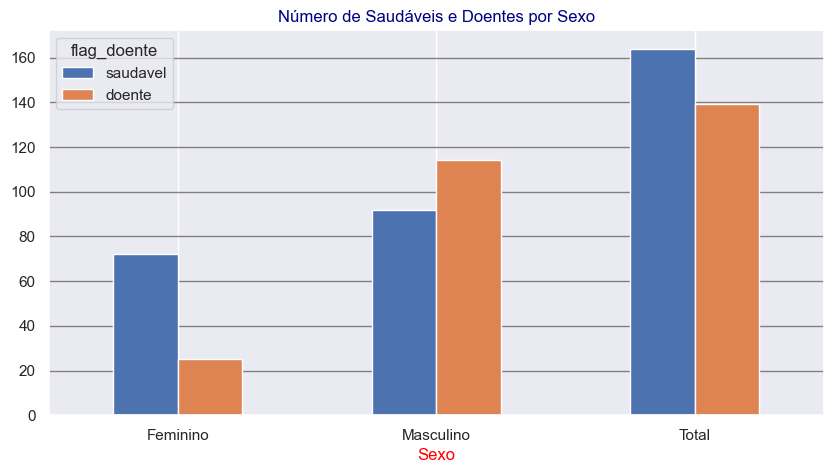

In [18]:
# gráfico de barras
ax0 = tab_biv_sex[['saudavel', 'doente']].plot.bar(rot=0, figsize=(10, 5), zorder=2)

ax0.set_title('Número de Saudáveis e Doentes por Sexo', color ='navy')
ax0.set_xlabel('Sexo', color ='red')
ax0.set_xticklabels(['Feminino', 'Masculino', 'Total'])

ax0.grid(zorder=1, color='grey', axis='y')

plt.show()


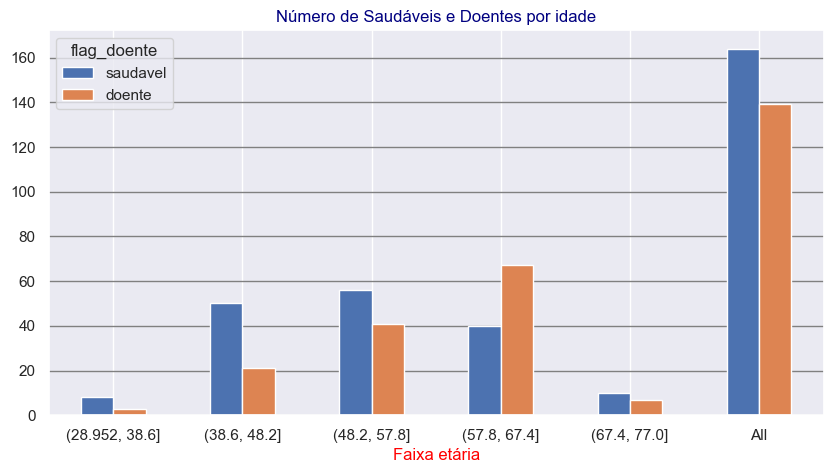

In [20]:
ax0 = tab_biv_age[['saudavel', 'doente']].plot.bar(rot=0, figsize=(10, 5), zorder=2)

ax0.set_title('Número de Saudáveis e Doentes por idade', color ='navy')
ax0.set_xlabel('Faixa etária', color ='red')
ax0.grid(zorder=1, color='grey', axis='y')

plt.show()

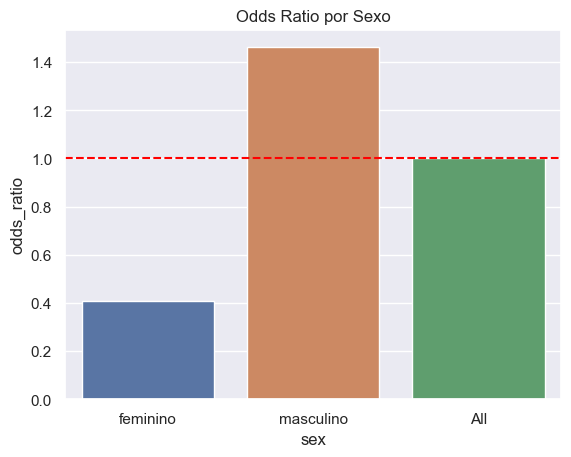

In [29]:
# criar um barplot 
sns.barplot(data=tab_biv_sex, x='sex', y='odds_ratio', hue= 'sex')
plt.axhline(1, color='red', linestyle='--')  # linha de referência (odds_ratio neutro)
plt.title('Odds Ratio por Sexo')

plt.show()

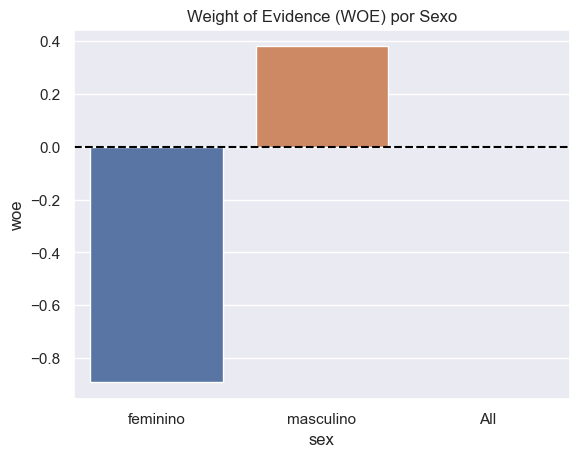

In [31]:
sns.barplot(data=tab_biv_sex, x='sex', y='woe', hue = 'sex')
plt.axhline(0, color='black', linestyle='--')
plt.title('Weight of Evidence (WOE) por Sexo')
plt.show()